<a href="https://colab.research.google.com/github/arishp/veltech_genai_images/blob/main/diffusion_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
from diffusers import StableDiffusionPipeline
import torch

from google.colab import userdata
hf_token = userdata.get('HF_TOKEN')

device = "cuda" if torch.cuda.is_available() else "mps" if torch.backends.mps.is_available() else "cpu"
print(f"Using device: {device}")

try:
  model_id = "sd-legacy/stable-diffusion-v1-5"
  pipe = StableDiffusionPipeline.from_pretrained(model_id, torch_dtype=torch.float16 if device == "cuda" else torch.float32, token=hf_token)
  pipe = pipe.to("cuda")

    # Recommended for Mac (MPS) to avoid some memory issues
  if device == "mps":
    pipe.enable_attention_slicing()

  print("Model loaded successfully.")
except Exception as e:
  print(f"An error occurred loading the model: {e}")

Using device: cuda


model_index.json:   0%|          | 0.00/541 [00:00<?, ?B/s]

Fetching 15 files:   0%|          | 0/15 [00:00<?, ?it/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

Loading weights:   0%|          | 0/196 [00:00<?, ?it/s]

CLIPTextModel LOAD REPORT from: /root/.cache/huggingface/hub/models--sd-legacy--stable-diffusion-v1-5/snapshots/451f4fe16113bff5a5d2269ed5ad43b0592e9a14/text_encoder
Key                                | Status     |  | 
-----------------------------------+------------+--+-
text_model.embeddings.position_ids | UNEXPECTED |  | 

Notes:
- UNEXPECTED	:can be ignored when loading from different task/architecture; not ok if you expect identical arch.


Loading weights:   0%|          | 0/396 [00:00<?, ?it/s]

StableDiffusionSafetyChecker LOAD REPORT from: /root/.cache/huggingface/hub/models--sd-legacy--stable-diffusion-v1-5/snapshots/451f4fe16113bff5a5d2269ed5ad43b0592e9a14/safety_checker
Key                                               | Status     |  | 
--------------------------------------------------+------------+--+-
vision_model.vision_model.embeddings.position_ids | UNEXPECTED |  | 

Notes:
- UNEXPECTED	:can be ignored when loading from different task/architecture; not ok if you expect identical arch.


Model loaded successfully.


In [6]:
def generate_image(prompt, save_path="generated_image.png"):
    """
    Generates an image from a text prompt using the loaded Stable Diffusion pipeline.

    Args:
        prompt (str): The text prompt to generate the image from.
        save_path (str): The path to save the generated image.
    """
    try:
        # Generate the image
        print(f"Generating image for prompt: '{prompt}'")
        # Note: pipe is accessed from the global scope of the notebook
        image = pipe(prompt).images[0]

        # Save the image
        image.save(save_path)
        print(f"Image saved to {save_path}")
        return image

    except Exception as e:
        print(f"An error occurred during generation: {e}")
        return None

Generating image for prompt: 'a photo of an astronaut riding a horse on mars'


  0%|          | 0/50 [00:00<?, ?it/s]

Image saved to generated_image.png


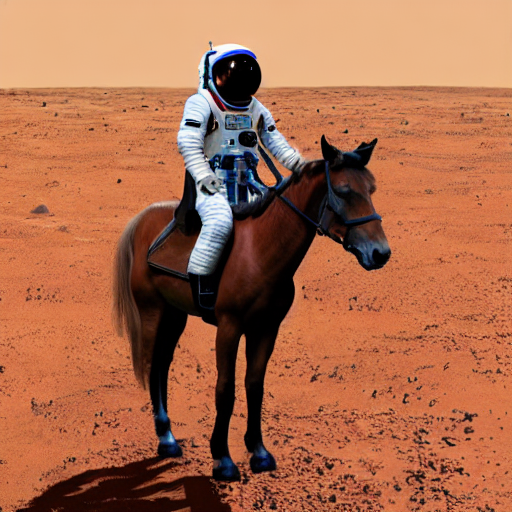

In [7]:
prompt = "a photo of an astronaut riding a horse on mars"
image = generate_image(prompt)

# Display the image in the notebook if generated
if image:
    # Creating a thumbnail for display if needed, or just showing usage
    display(image)